<a href="https://colab.research.google.com/github/RenukaBenkalkar/Python/blob/main/NLP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#load dataset
from google.colab import files
d=files.upload()

Saving twitter.csv to twitter.csv


In [4]:
#Read Dataset
df =pd.read_csv('twitter.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [7]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [8]:
df.isnull().sum()

,0
id,0
label,0
tweet,0


<Axes: xlabel='label', ylabel='count'>

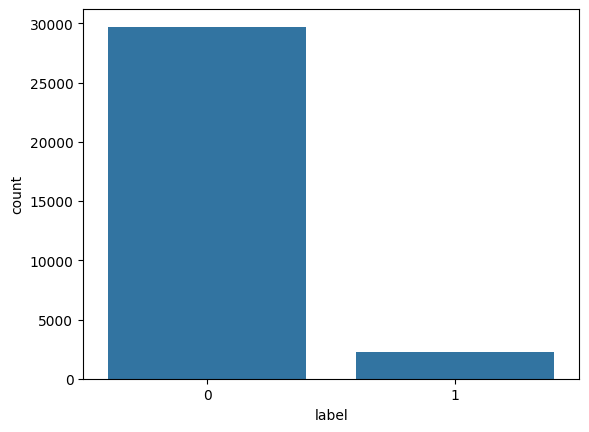

In [9]:
sns.barplot(data=df['label'].value_counts())

In [10]:
#Tokenization
from nltk import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
#function that tokenizes each and every twitter into words and find length
def count_words(tweet):
  words=word_tokenize(tweet) # convert sentence to words
  return len(words)         # count the total words

In [12]:
#New column count is created
df['count'] =df['tweet'].apply(count_words)

In [13]:
df['count']

,count
0,21
1,27
2,3
3,18
4,6
...,...
31957,8
31958,26
31959,13
31960,16


In [14]:
df.head()

,id,label,tweet,count
0,1,0,@user when a father is dysfunctional and is s...,21
1,2,0,@user @user thanks for #lyft credit i can't us...,27
2,3,0,bihday your majesty,3
3,4,0,#model i love u take with u all the time in ...,18
4,5,0,factsguide: society now #motivation,6


In [15]:
df.columns

Index(['id', 'label', 'tweet', 'count'], dtype='object')

In [16]:
#Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
#Remove punctuations
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [27]:
# create function to remove punctuation,stop words and convert to lower case
def preprocess_text(tweet):
  no_punc= [char for char in tweet if char not in string.punctuation]
  no_punc=''.join(no_punc)
  return ''.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [28]:
#Apply to complete dataset
df['tweet']=df['tweet'].apply(preprocess_text)

In [29]:
df['tweet'].head()

,tweet
0,userfatherdysfunctionalselfishdragskidsdysfunc...
1,useruserthankslyftcreditcantusecausedontofferw...
2,bihdaymajesty
3,modelloveutakeutimeurð±ððððð¦ð...
4,factsguidesocietymotivation


In [32]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [30]:
#steming -remove root words
def steming(tweet):
   return ''.join([stemmer.stem(word) for word in tweet])

In [33]:
df['tweet']=df['tweet'].apply(steming)

In [34]:
df['tweet'].head()

,tweet
0,userfatherdysfunctionalselfishdragskidsdysfunc...
1,useruserthankslyftcreditcantusecausedontofferw...
2,bihdaymajesty
3,modelloveutakeutimeurð±ððððð¦ð...
4,factsguidesocietymotivation


In [35]:
#vectorization- convert text to numbers
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
message=vectorizer.fit_transform(df['tweet'])
message.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
#Train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(message,df['label'],test_size=0.2,random_state=0)

In [37]:
#Model Building
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
model=nb.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [38]:
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
#Evaluation
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(ytest,ypred))

print(classification_report(ytest,ypred))

0.9405599874863132
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5985
           1       0.89      0.08      0.14       408

    accuracy                           0.94      6393
   macro avg       0.91      0.54      0.56      6393
weighted avg       0.94      0.94      0.92      6393



Model accuracy is 94%